## k-최근접 이웃 알고리즘
- 지도학습 알고리즘 중 하나이다.
- 굉장히 직관적이고 간단한 알고리즘이다.
- 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.
- knn의 특징은 훈련이 따로 필요 없다는 것이다. 다른 모델들은 fit(x_train, y_train)의 코드를 통해 훈련을 시킨다. 즉, 훈련데이터를 기반으로 모델을 만들고 테스트 데이터로 테스트하는 방식이지만 knn은 훈련데이터를 저장하는게 훈련의 전부이다.
- 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(Lazy model)이라고 부른다.

## 필요한 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams['font.family'] ='D2coding' # 원하는 글꼴
mpl.rcParams['axes.unicode_minus'] =False

### 데이터셋 로딩

In [3]:
## 도미의 관측 데이터셋
# 도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
## 도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


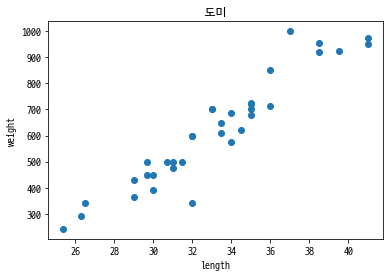

In [4]:
# 길이를 x, 무게를 y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.title('도미')
plt.show()

In [5]:
## 빙어 관측 데이터셋
# 빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

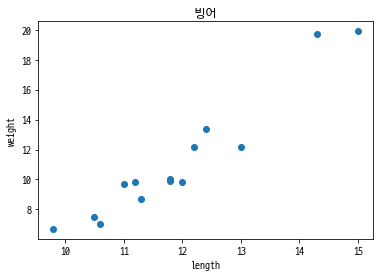

In [6]:
# 길이를 x, 무게를 y
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.title('빙어')
plt.show()

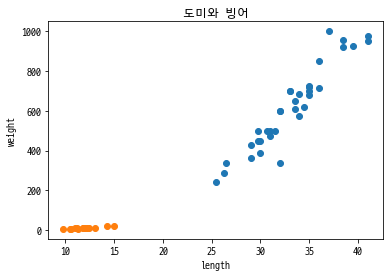

In [7]:
# 두개의 데이터셋을 함께 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.title('도미와 빙어')
plt.show()

In [8]:
# 머신러닝 패키지를 사용할 경우 특성을을 2차원 Numpy 배열로 만들어줘야 한다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [9]:
# 2차원 배열을 생성하기 위해 zip()함수와 리스트내포를 사용한다.
# zip() : 나열된 리스트에서 요소를 하나씩 꺼내주는 역할을 하는 함수
fish_data = [[l, w] for l, w in zip(length, weight)]

In [10]:
len(bream_weight)

35

In [11]:
len(smelt_weight)

14

In [12]:
# 도미(1), 빙어(0)
# 머신에서 찾고자 하는 것에 1을 나머지는 0으로 둔다
fish_target = [1] * 35 + [0] * 14

- 데이터셋의 길이 {도미 : 35, 빙어 :14}<br>
- 도미를 구분하기 위한 '타겟'을 1과 0으로 구분하여 지정

### knn 알고리즘 : 2진 분류 알고리즘

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# 인스턴스 객체 생성
knn = KNeighborsClassifier()
# 훈련 - 모델에 데이터를 전달하여 규칙을 학습하는 과정을 말한다.
model = knn.fit(fish_data, fish_target)
# 평가(정확도 검사)
model.score(fish_data, fish_target)

1.0

In [14]:
# knn 학습모델
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

> 학습모델 확인 KNeighborsClassifier()

***KNeighborsClassifier(<br>
algorithm='auto', leaf_size=30, metric='minkowski',            
metric_params=None, n_jobs=None, n_neighbors=5, p=2, 
        weights='uniform'<br> 
                              )***

- n_neighbors : 근접한 이웃의 수(k)
- p : 1(맨해튼 거리), 2(유클리드안 거리)
- weights : 가중치

**k-최근접 모델은 가장 최적의 'k'값을 찾아내는 것이 목표!**

In [15]:
# 예측 - 새로운 데이터를 추가하여 분류하는 작업
# 길이 - 30, 무게 600인 데이터
knn.predict([[30, 600]])

array([1])

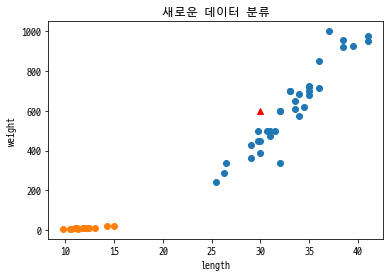

In [16]:
# 두개의 데이터셋을 함께 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker = '^', color = 'red')

plt.plot()

plt.xlabel('length')
plt.ylabel('weight')

plt.title('새로운 데이터 분류')
plt.show()

In [17]:
model._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [18]:
knn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [19]:
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [20]:
knn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

> k값을 전체(49개) 데이터셋의 갯수로 설정한다면?

In [21]:
## k값을 전체(49개) 데이터셋의 갯수로 설정한다면?

kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [22]:
# 도미 데이터 수/ 전체 데이터 수
35/ 49

0.7142857142857143

## 훈련 데이터와 테스트 데이터

In [23]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [24]:
# 훈련데이터 35개, 테스트데이터 14개 분리하는 작업
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [25]:
kn = KNeighborsClassifier()
kn.fit(train_data, train_target)
kn.score(test_input, test_target)

NameError: name 'train_data' is not defined

In [ ]:
# numpy 배열을 이용하여 데이터를 섞는 작업을 수행한다.
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
input_arr

In [ ]:
input_arr.shape

In [ ]:
target_arr.shape

In [ ]:
# 주의할 점은 input과 target은 같은 위치에 함께 선택되어야 한다.
np.random.seed(42)
index = np.arange(49)

# shuffle()
np.random.shuffle(index)

In [ ]:
index

In [ ]:
index[0]

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
## 셔플된 값이 제대로 들어갔는지 확인!
print(input_arr[13], train_input[0])

In [ ]:
## 파란색 : 훈련 데이터셋 , 주황색 : 테스트 데이터셋
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

- 훈련데이터의 값이 확연히 차이가 나기때문에, 테스트 결과에서도 100퍼센트 정확도를 보인다.
- 모델의 활용도를 의심해볼만 하다...

## 데이터 전처리(data preprocessing)

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
# column_stack() : 배열 결합
np.column_stack([[1, 2, 3], [4, 5, 6]])

In [ ]:
fish_data = np.column_stack([fish_length,fish_weight])
fish_data[:5]

In [ ]:
# np.zeros(), np.ones() : 0과 1로된 배열 생성
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

### 훈련 데이터와 테스트 데이터 분리 (여기서 비교해보기)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(\
                                                                     fish_data, fish_target, random_state = 42)

In [ ]:
type(train_input)

In [ ]:
print(train_input.shape, test_input.shape)

In [ ]:
test_target

In [ ]:
train_target, test_target, train_target, test_target = train_test_split(\
                                                                       fish_data, fish_target,stratify = fish_target, random_state = 42)

In [ ]:
test_target

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


In [ ]:
kn.predict([[25, 150]])

In [ ]:
## 빨간 삼각형 : 길이 25, 무게 150인 생선 데이터
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(25, 150, marker = '^', color = 'r')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
# kneighbors() : 이웃까지의 거리와 이웃의 샘플의 인덱스를 반환하는 함수
distances, indexs = kn.kneighbors([[25, 150]])

In [ ]:
## 주황색 다이아 : 입력된 생선데이터와 근접한 다섯개의 점

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^', color = 'r')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker ='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
train_input[indexs]

In [ ]:
train_target[indexs]

In [ ]:
## 근접한 점들과의 거리
distances

> 왜 시각적인 거리와 계산한 거리가 다르게 보일까??
 - x축과 y축(weight) 값의 단위가 다르므로 거리를 판단하기에 문제가 발생 => 정규화(스케일링)을 진행!

In [ ]:
## 주황색 다이아 : 입력된 생선데이터와 근접한 다섯개의 점

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^', color = 'r')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker ='D')

plt.xlim(0, 1000) ## x축의 단위를 y축과 맞추었더니, y축(weight) 값에 치중되어 있음을 알 수 있음

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

### 피쳐 스케일링(여기서 표준화 활용)
- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다
- 최소 - 최대 정규화(min-max normalization) : X<sub>new</sub> = X-min(x) / max(x) - min(x)
- z-점수 표준화(z-value standardization) : X<sub>new</sub> = X-mean(x) / std(x)

In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [ ]:
train_scaled = (train_input - mean) / std ##

In [ ]:
mean

In [ ]:
train_input

In [ ]:
## 생선데이터(25, 150)도 스케일링 해주어야 한다.
new = ([25, 150] - mean) / std

In [ ]:
new

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^', color = 'r')



plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.fit(train_scaled, train_target)

In [ ]:
kn.score(test_scaled, test_target)

In [ ]:
kn.predict([new])

In [ ]:
distances, indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs, 1], marker = 'D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 붓꽃(iris) 품종 분류 분석

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
# Bunch 클래스 객체는 파이썬의 딕셔너리와 비슷하다.
iris

In [ ]:
print('iris의 키 : \n', iris.keys())

In [ ]:
print(iris['DESCR'][:193] + '\n')

In [ ]:
# 데이터프레임으로 변환하여 내용 확인
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [ ]:
df.tail()

In [ ]:
iris['data'].shape

In [ ]:
iris['target'].shape

### 훈련 데이터와 테스트 데이터 분리
- 훈련 데이터 : 머신러닝 모델을 만들 때 사용
- 테스트 데이터(테스트세드, 홀드아웃세트) : 모델이 얼마나 잘 작동하는지 측정하는데 사용

In [ ]:
pd.DataFrame(x_train, columns = iris.feature_names)

In [ ]:
df = pd.DataFrame(x_train, columns = iris.feature_names)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

In [ ]:
print('x_train 크기 : ', x_train.shape)
print('y_train 크기 : ', y_train.shape)

In [ ]:
print('x_test 크기 : ', x_test.shape)
print('y_test 크기 : ', y_test.shape)

### 데이터 살펴보기

In [ ]:
y_train

In [ ]:
pd.plotting.scatter_matrix(df, c = y_train, figsize = (15, 15), 
                        marker = 'o', hist_kwds={'bins' : 20}, s = 60, alpha = .8)

### knn 최근접 이웃 알고리즘(단점 : 적절한 k의 선택이 필요하다)
- k가 너무 작을 때 : Overfitting(과대적합)
- k가 너무 클 때 : Underfitting(과소적합)
- 모델이 복잡할수록 훈련 데이터에 대해서는 더 정확하게 예측한다.
- 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.

In [ ]:
!pip install mglearn

In [ ]:
import mglearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(x_train, y_train)

In [ ]:
print('훈련세트의 정확도 : {:.2f}'.format(knn.score(x_train, y_train)))

### 예측하기

In [ ]:
x_new = np.array([[5, 2.9, 1, 0.2]]) ## 가상의 아이리스 데이터
print('x_new.shape : ', x_new.shape)

In [ ]:
prediction = knn.predict(x_new)
print('예측 : ', prediction)
print('예측한 타깃의 이름 : ', iris['target_names'][prediction])

### 모델 평가하기

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print('테스트 데이터에 대한 예측값 : \n', y_pred)

In [ ]:
for i in range(0, len(y_pred)):
    yhat = y_pred[i]
    print('{} : {}'.format(x_test[i], iris['target_names'][yhat]))

In [ ]:
print('테스트 데이터의 정확도 : {:.2f}'.format(knn.score(x_test, y_test)))

In [ ]:
print('테스트 데이터의 정확도 : {:.2f}'.format(np.mean(y_pred == y_test)))

In [ ]:
y_pred == y_test

In [ ]:
y_pred

In [ ]:
y_test

- 사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다.
    1. confusion_matrix(y_true, y_pred)
    2. accuracy_score(y_true, y_pred)
    3. precision_score(y_true, y_pred)
    4. 
    5. fbeta_score(y_true, y_pred, beta)
    6.

### 최적의 k값 찾기

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# 1 ~ 100

ks = 100
mean_acc = np.zeros((ks - 1))

for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    yhat = clf.predict(x_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)
    
## y_test : 예측값, y_hat : 실제정답

print(mean_acc)

In [ ]:
# 시각화
plt.plot(range(1, ks), mean_acc, 'g')

plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.tight_layout()

plt.show()

In [ ]:
max(mean_acc)

## 와인 데이터
- 와인의 화학 성분을 이용하여 와인의 종류를 예측하기 위한 데이터셋

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

In [ ]:
wine

### 데이터셋 확인

In [ ]:
print('wine 데이터셋 키 : \n', wine.keys())

In [ ]:
len(wine['data'][0])  ## 특성의 개수 : 13개

#   'alcohol',
#   'malic_acid',
#   'ash',
#   'alcalinity_of_ash',
#   'magnesium',
#   'total_phenols',
#   'flavanoids',
#   'nonflavanoid_phenols',
#   'proanthocyanins',
#   'color_intensity',
#   'hue',
#   'od280/od315_of_diluted_wines',
#   'proline'

In [ ]:
## 데이터셋 구조 확인
print(wine['DESCR'][:193] + '\n')

In [ ]:
wine.feature_names

In [ ]:
# 데이터프레임으로 변환하여 내용 확인
df = pd.DataFrame(wine.data, columns = wine.feature_names)
sy = pd.Series(wine.target, dtype = 'category')
sy = sy.cat.rename_categories(wine.target_names)
df['species'] = sy

In [ ]:
df

In [ ]:
df.shape  ## 'data(13)' + 'target'

### 데이터셋 분리(훈련/테스트)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine['data'], wine['target'], random_state = 0)

In [ ]:
print('x_train 크기 : ', x_train.shape)
print('y_train 크기 : ', y_train.shape)

In [ ]:
print('x_test 크기 : ', x_test.shape)
print('y_test 크기 : ', y_test.shape)

In [ ]:
133/(133+45)  ## 훈련 데이터셋 비율 : 0.75 / 0.25

### 데이터 살펴보기

## 유방암 진단 데이터
- 유방암(breast cancer) 진단 데이터 셋
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특정값을 사용하여 종양이 양성(bengin)인지 악성(malignant)인지를 판별하는 예제

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer